In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [111]:
#import summer olympics data
oly_df = pd.read_csv("summer.csv")
oly_df.head(20)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
5,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200M Freestyle,Bronze
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
7,1896,Athens,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200M Freestyle,Silver
8,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400M Freestyle,Bronze
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold


In [120]:
# Create list of Olympic Games + Host Locations. FYI: There have been 28 summer olympics since the start of the games, 27 are included in dataset
# make a new table that lists all the cities and years that summer olympics took place

games_df = oly_df[["Year", "City"]]
years_group = games_df.groupby(["Year"])

host_df = pd.DataFrame(years_group["City"].first())

#add country name that correlates with each year. Just did it manually since there's only 27 in the list
host_countries= ["Greece", "France", "USA", "UK", "Sweden", "Belgium", "France", "Netherlands", "USA", "Germany", "UK", "Norway", "Australia/Sweden", "Italy", "Japan", "Mexico", "Germany", "Canada", "Russia", "USA", "South Korea", "Spain", "USA", "Australia", "Greece", "China", "UK"]
host_df["Country"]=host_countries
host_df2 = pd.DataFrame(host_df["Country"].value_counts())
host_df2.reset_index()
host_df2.rename(columns={"index":"Country", "Country":"Number of Times Hosted"})

#Consider the Host Effect in 5 different countries = USA, UK, Germany, France, Greece
years_df = host_df.reset_index()
years_df

,Year,City,Country
0,1896,Athens,Greece
1,1900,Paris,France
2,1904,St Louis,USA
3,1908,London,UK
4,1912,Stockholm,Sweden
5,1920,Antwerp,Belgium
6,1924,Paris,France
7,1928,Amsterdam,Netherlands
8,1932,Los Angeles,USA
9,1936,Berlin,Germany


In [91]:
#Create a Table that shows TOTAL medal counts per country (ALL TIME)
#total medals count
total_df = oly_df.groupby(["Country"])
total_df2 = pd.DataFrame(total_df["Medal"].count())
total_df3 = total_df2.rename(columns={"Medal":"Total Medals"})

#gold medals count
gold_df = oly_df.loc[oly_df["Medal"] == "Gold"]
gold_country = gold_df.groupby(["Country"])
gold_df = pd.DataFrame(gold_country["Medal"].count())
gold_df2 = gold_df.rename(columns={"Medal": "Gold Medals"})


#silver medals count
silver_df = oly_df.loc[oly_df["Medal"] == "Silver"]
silver_country = silver_df.groupby(["Country"])
silver_df = pd.DataFrame(silver_country["Medal"].count())
silver_df2 = silver_df.rename(columns={"Medal": "Silver Medals"})


#bronze medals count
bronze_df = oly_df.loc[oly_df["Medal"] == "Bronze"]
bronze_country = bronze_df.groupby(["Country"])
bronze_df = pd.DataFrame(bronze_country["Medal"].count())
bronze_df2 = bronze_df.rename(columns={"Medal": "Bronze Medals"})



#table that shows all medals
merged_df1 = pd.merge(gold_df2, silver_df2, on='Country', how='outer')
merged_df2 = pd.merge(merged_df1, bronze_df2, on="Country", how = "outer")
merged_df3 = pd.merge(merged_df2, total_df3, on="Country", how="outer")
merged_df4= merged_df3.reset_index()
merged_df4.head()

merged_df5= merged_df4.loc[merged_df4["Total Medals"] > 100]
merged_df5.head()

,Country,Gold Medals,Silver Medals,Bronze Medals,Total Medals
2,ARG,69.0,99.0,91.0,259
4,AUS,312.0,405.0,472.0,1189
5,AUT,21.0,81.0,44.0,146
9,BEL,91.0,168.0,152.0,411
10,BLR,17.0,37.0,59.0,113


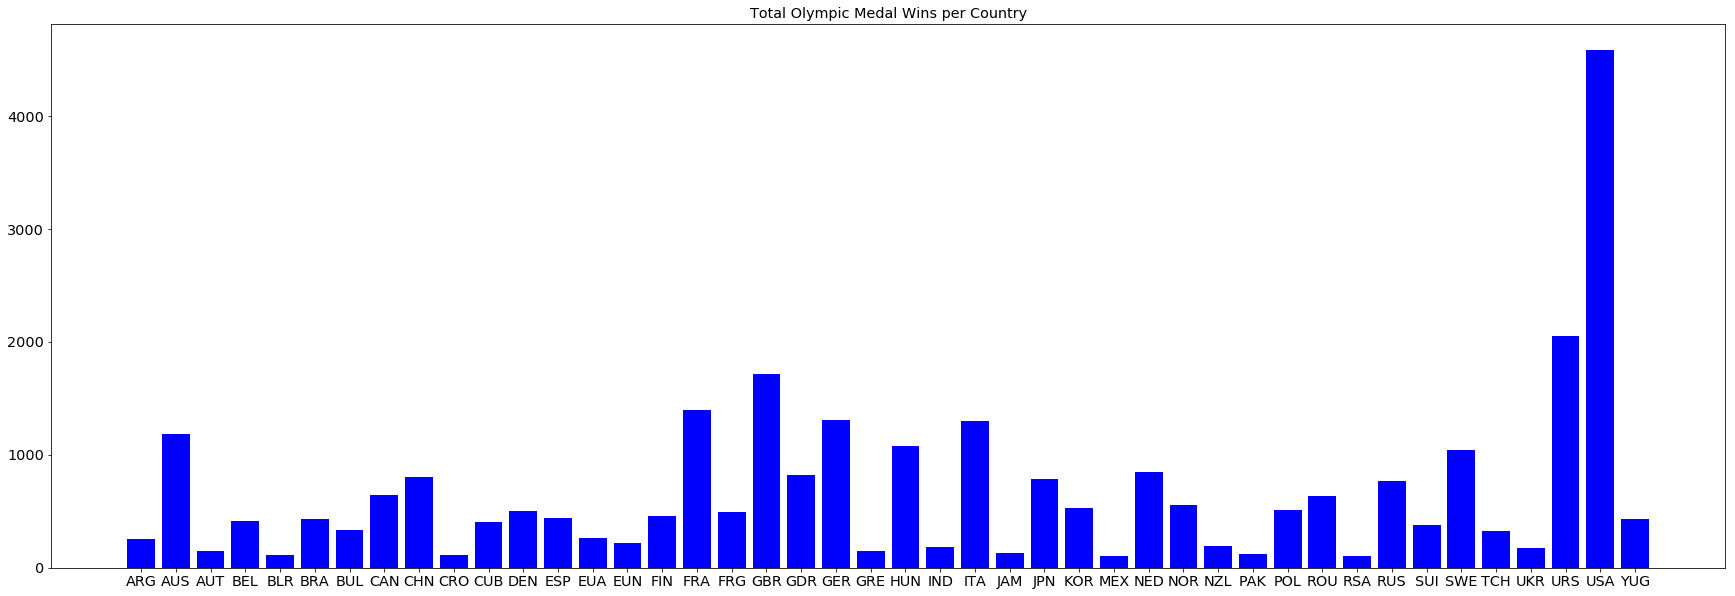

In [90]:
#Create a bar graph that shows Total wins per country
x_axis = merged_df5["Country"]
y_axis = merged_df5["Total Medals"]

plt.figure(figsize=(30,10))
plt.bar(x_axis, y_axis, color = "b", align="center")
plt.title("Total Olympic Medal Wins per Country")

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [21]:
#Create a blank dataframe for merging in loop
country_df = pd.DataFrame(oly_df["Country"].unique())
country_df = country_df.rename(columns={0:"Country"})
country_df.head()

,Country
0,HUN
1,AUT
2,GRE
3,USA
4,GER


In [44]:
#Create a Table that shows TOTAL medal counts per country (FOR EACH OLYMPICS)
year_list = oly_df["Year"].unique()

total_data_year = []
total_merged = country_df

#set up for loop
for year in year_list:
    year_df = oly_df.loc[oly_df["Year"] == year]

    #total medals count
    total_country = year_df.groupby(["Country"])
    total_df = pd.DataFrame(total_country["Medal"].count())
    total_df2 = total_df.rename(columns={"Medal": (f"{year} Total Medals")})

    total_data_year.append(total_df2)


#set up a loop to merge everything
for x in range(len(total_data_year)):
    total_merged = pd.merge(total_merged, total_data_year[x], on='Country', how='outer')  

total_merged.head()

,Country,1896 Total Medals,1900 Total Medals,1904 Total Medals,1908 Total Medals,1912 Total Medals,1920 Total Medals,1924 Total Medals,1928 Total Medals,1932 Total Medals,...,1976 Total Medals,1980 Total Medals,1984 Total Medals,1988 Total Medals,1992 Total Medals,1996 Total Medals,2000 Total Medals,2004 Total Medals,2008 Total Medals,2012 Total Medals
0,HUN,6.0,5.0,4.0,18.0,30.0,NaN,20.0,20.0,32.0,...,55.0,61.0,NaN,44.0,45.0,43.0,53.0,40.0,27.0,26.0
1,AUT,5.0,6.0,1.0,1.0,14.0,NaN,4.0,4.0,5.0,...,1.0,5.0,3.0,1.0,6.0,3.0,4.0,8.0,3.0,NaN
2,GRE,52.0,NaN,2.0,3.0,2.0,5.0,NaN,NaN,NaN,...,NaN,5.0,2.0,1.0,2.0,8.0,18.0,31.0,7.0,3.0
3,USA,20.0,55.0,394.0,63.0,101.0,193.0,198.0,84.0,181.0,...,155.0,NaN,333.0,193.0,224.0,260.0,248.0,264.0,315.0,250.0
4,GER,33.0,40.0,13.0,22.0,52.0,NaN,NaN,72.0,38.0,...,NaN,NaN,NaN,NaN,198.0,124.0,119.0,149.0,101.0,94.0


TypeError: unhashable type: 'numpy.ndarray'

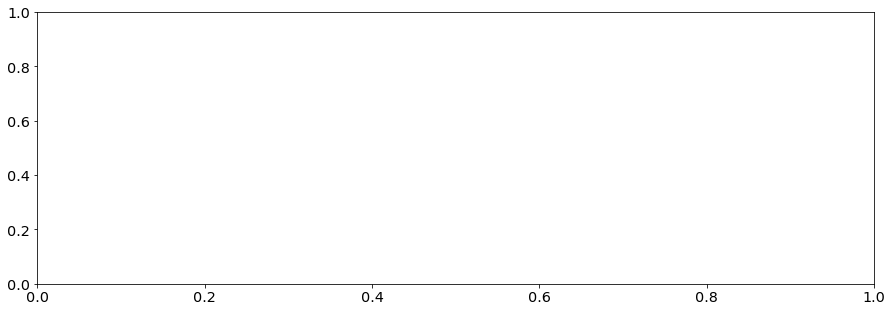

In [121]:
#UK = GBR = Great Britain
GBR_wins = total_merged.loc[total_merged["Country"]=="GBR"]
y_wins = GBR_wins
x_years = years_df["Year"]
plt.scatter(x_years, y_wins, marker="o", facecolors="red", edgecolors="black")

In [43]:
#Create a Table that shows GOLD medal counts per country (FOR EACH OLYMPICS)

gold_data_year = []
gold_merged = country_df


#set up for loop
for year in year_list:
    year_df = oly_df.loc[oly_df["Year"] == year]

    #gold medals count
    gold_df = year_df.loc[oly_df["Medal"] == "Gold"]
    gold_country = gold_df.groupby(["Country"])
    gold_df2 = pd.DataFrame(gold_country["Medal"].count())
    gold_df3 = gold_df2.rename(columns={"Medal": (f"{year} Gold Medals")})
    gold_data_year.append(gold_df3)

    
#set up a loop to merge everything
for x in range(len(gold_data_year)):
    gold_merged = pd.merge(gold_merged, gold_data_year[x], on='Country', how='outer')

gold_merged.head()

,Country,1896 Gold Medals,1900 Gold Medals,1904 Gold Medals,1908 Gold Medals,1912 Gold Medals,1920 Gold Medals,1924 Gold Medals,1928 Gold Medals,1932 Gold Medals,...,1976 Gold Medals,1980 Gold Medals,1984 Gold Medals,1988 Gold Medals,1992 Gold Medals,1996 Gold Medals,2000 Gold Medals,2004 Gold Medals,2008 Gold Medals,2012 Gold Medals
0,HUN,2.0,1.0,2.0,6.0,10.0,NaN,2.0,9.0,20.0,...,14.0,8.0,NaN,20.0,14.0,8.0,25.0,24.0,16.0,12.0
1,AUT,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,...,NaN,1.0,1.0,1.0,NaN,NaN,3.0,3.0,NaN,NaN
2,GRE,10.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,2.0,4.0,4.0,8.0,NaN,NaN
3,USA,11.0,27.0,146.0,34.0,45.0,110.0,110.0,43.0,78.0,...,63.0,NaN,168.0,77.0,89.0,160.0,130.0,116.0,125.0,147.0
4,GER,26.0,11.0,4.0,4.0,10.0,NaN,NaN,20.0,7.0,...,NaN,NaN,NaN,NaN,81.0,42.0,31.0,41.0,42.0,45.0


In [42]:
#Create a Table that shows SILVER medal counts per country (FOR EACH OLYMPICS)

silver_data_year = []
silver_merged = country_df


#set up for loop
for year in year_list:
    year_df = oly_df.loc[oly_df["Year"] == year]

    #silver medals count
    silver_df = year_df.loc[oly_df["Medal"] == "Silver"]
    silver_country = silver_df.groupby(["Country"])
    silver_df2 = pd.DataFrame(silver_country["Medal"].count())
    silver_df3 = silver_df2.rename(columns={"Medal": (f"{year} Silver Medals")})

    silver_data_year.append(silver_df3)
    
    
#set up a loop to merge everything
for x in range(len(silver_data_year)):
    silver_merged = pd.merge(silver_merged, silver_data_year[x], on='Country', how='outer')  

silver_merged.head()

,Country,1896 Silver Medals,1900 Silver Medals,1904 Silver Medals,1908 Silver Medals,1912 Silver Medals,1920 Silver Medals,1924 Silver Medals,1928 Silver Medals,1932 Silver Medals,...,1976 Silver Medals,1980 Silver Medals,1984 Silver Medals,1988 Silver Medals,1992 Silver Medals,1996 Silver Medals,2000 Silver Medals,2004 Silver Medals,2008 Silver Medals,2012 Silver Medals
0,HUN,1.0,2.0,1.0,7.0,17.0,NaN,10.0,11.0,4.0,...,6.0,13.0,NaN,9.0,23.0,9.0,24.0,12.0,8.0,8.0
1,AUT,1.0,3.0,NaN,NaN,9.0,NaN,3.0,NaN,1.0,...,NaN,3.0,1.0,NaN,6.0,1.0,1.0,4.0,1.0,NaN
2,GRE,20.0,NaN,NaN,3.0,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,4.0,6.0,18.0,3.0,NaN
3,USA,7.0,14.0,137.0,14.0,25.0,45.0,37.0,24.0,44.0,...,56.0,NaN,115.0,64.0,50.0,48.0,66.0,75.0,109.0,57.0
4,GER,5.0,19.0,4.0,11.0,19.0,NaN,NaN,13.0,26.0,...,NaN,NaN,NaN,NaN,57.0,35.0,23.0,45.0,16.0,28.0


In [41]:
#Create a Table that shows BRONZE medal counts per country (FOR EACH OLYMPICS)

bronze_data_year = []
bronze_merged = country_df


#set up for loop
for year in year_list:
    year_df = oly_df.loc[oly_df["Year"] == year]

    
    #bronze medals count
    bronze_df = year_df.loc[oly_df["Medal"] == "Bronze"]
    bronze_country = bronze_df.groupby(["Country"])
    bronze_df2 = pd.DataFrame(bronze_country["Medal"].count())
    bronze_df3 = bronze_df2.rename(columns={"Medal": (f"{year} Bronze Medals")})

    bronze_data_year.append(bronze_df3)
    
#set up a loop to merge everything
for x in range(len(bronze_data_year)):
    bronze_merged = pd.merge(bronze_merged, bronze_data_year[x], on='Country', how='outer')  

bronze_merged.head()

,Country,1896 Bronze Medals,1900 Bronze Medals,1904 Bronze Medals,1908 Bronze Medals,1912 Bronze Medals,1920 Bronze Medals,1924 Bronze Medals,1928 Bronze Medals,1932 Bronze Medals,...,1976 Bronze Medals,1980 Bronze Medals,1984 Bronze Medals,1988 Bronze Medals,1992 Bronze Medals,1996 Bronze Medals,2000 Bronze Medals,2004 Bronze Medals,2008 Bronze Medals,2012 Bronze Medals
0,HUN,3.0,2.0,1.0,5.0,3.0,NaN,8.0,NaN,8.0,...,35.0,40.0,NaN,15.0,8.0,26.0,4.0,4.0,3.0,6.0
1,AUT,2.0,3.0,1.0,1.0,5.0,NaN,1.0,2.0,3.0,...,1.0,1.0,1.0,NaN,NaN,2.0,NaN,1.0,2.0,NaN
2,GRE,22.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,4.0,1.0,1.0,NaN,NaN,8.0,5.0,4.0,3.0
3,USA,2.0,14.0,111.0,15.0,31.0,38.0,51.0,17.0,59.0,...,36.0,NaN,50.0,52.0,85.0,52.0,52.0,73.0,81.0,46.0
4,GER,2.0,10.0,5.0,7.0,23.0,NaN,NaN,39.0,5.0,...,NaN,NaN,NaN,NaN,60.0,47.0,65.0,63.0,43.0,21.0


In [92]:
#Table of USA medals per year
#To do HOST EFFECT analysis
usa_df = oly_df.loc[oly_df["Country"] == "USA"]

#total medals
usa_total_group = usa_df.groupby(["Year"])
total_count = usa_total_group["Medal"].count()

#total athletes
athlete_count = usa_total_group["Athlete"].count()

#gold  medals
usa_gold_df = usa_df.loc[usa_df["Medal"]=="Gold"]
gold_year_group = usa_gold_df.groupby(["Year"])
gold_count = gold_year_group["Medal"].count()

#silver medals
usa_silv_df = usa_df.loc[usa_df["Medal"]=="Silver"]
silv_year_group = usa_silv_df.groupby(["Year"])
silv_count = silv_year_group["Medal"].count()

#bronze  medals
usa_bron_df = usa_df.loc[usa_df["Medal"]=="Bronze"]
bron_year_group = usa_bron_df.groupby(["Year"])
bron_count = bron_year_group["Medal"].count()


#create a dictionary for all USA win data
usa_data = {"Total Medals": total_count,
            "Gold Medals": gold_count,
           "Silver Medals": silv_count,
           "Bronze Medals": bron_count,
           "Total Athletes": athlete_count}

#convert dictionary to pandas dataframe
usa_df = pd.DataFrame(usa_data)
usa_df2= usa_df.reset_index()

usa_df2.head()

,Year,Total Medals,Gold Medals,Silver Medals,Bronze Medals,Total Athletes
0,1896,20,11,7,2,20
1,1900,55,27,14,14,55
2,1904,394,146,137,111,394
3,1908,63,34,14,15,63
4,1912,101,45,25,31,101


<function matplotlib.pyplot.show(*args, **kw)>

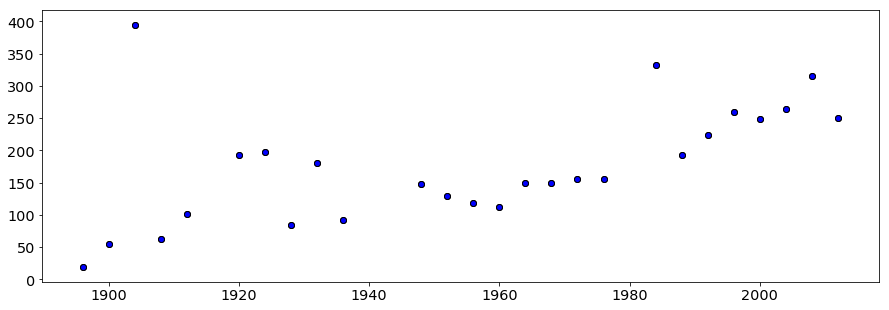

In [96]:
#PROBLEM. Our data set only shows WINS. It doesn't tell us how many athletes participated who didn't win
#Number of US wins vs. Number of Athletes
x_years = usa_df2["Year"]
y_medals = usa_df["Total Medals"]
plt.scatter(x_years, y_medals, marker="o", facecolors="red", edgecolors="black")
y2_athletes = usa_df2["Total Athletes"]
plt.scatter(x_years, y2_athletes, marker="o", facecolors="blue", edgecolors="black")

plt.show

In [ ]:
#Sports where US dominates 

In [ ]:
#What is the association between economic developmetn and olympic wins? More developed countries win more?
